In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, classes):
    """
    Confusion matrix'i görselleştirmek için kullanılan fonksiyon.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes, rotation=45)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
dataset =pd.read_csv('/content/drive/MyDrive/master-iot-data/cleaned_merged_data.csv')
data = dataset.copy()
data

**Random Forests**

Confusion Matrix:


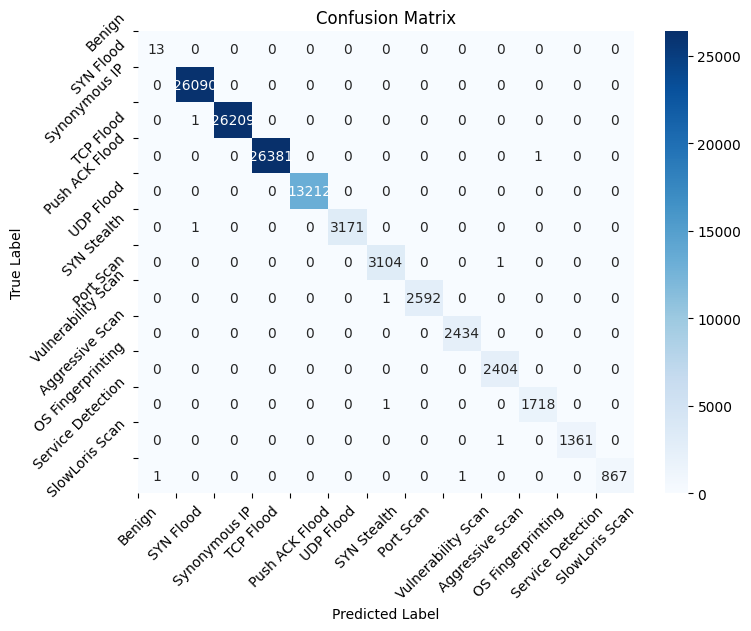


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00     26090
           2       1.00      1.00      1.00     26210
           3       1.00      1.00      1.00     26382
           4       1.00      1.00      1.00     13212
           5       1.00      1.00      1.00      3172
           6       1.00      1.00      1.00      3105
           7       1.00      1.00      1.00      2593
           8       1.00      1.00      1.00      2434
           9       1.00      1.00      1.00      2404
          10       1.00      1.00      1.00      1719
          11       1.00      1.00      1.00      1362
          12       1.00      1.00      1.00       869

    accuracy                           1.00    109565
   macro avg       0.99      1.00      1.00    109565
weighted avg       1.00      1.00      1.00    109565


Accuracy: 0.999917856979875
F1 Score: 0.99991801932072

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# Veriyi özellikler ve etiketler olarak ayır
X = data.drop(columns=['Attack_Num'])  # Özellikler
y = data['Attack_Num']  # Etiketler

# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
rf_model = RandomForestClassifier()

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

# Test veri kümesi üzerinde tahmin yap
start_test_time = time.time()
y_pred = rf_model.predict(X_test)
end_test_time = time.time()

# Metrikleri hesapla
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
class_names = ['Benign','SYN Flood', 'Synonymous IP', 'TCP Flood', 'Push ACK Flood', 'UDP Flood', 'SYN Stealth',
          'Port Scan', 'Vulnerability Scan', 'Aggressive Scan', 'OS Fingerprinting',
          'Service Detection', 'SlowLoris Scan']
plot_confusion_matrix(cm, class_names)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy, F1 score, Precision, Recall hesapla
accuracy = (cm[0,0] + cm[1,1] + cm[2,2] + cm[3,3] + cm[4,4] + cm[5,5] + cm[6,6] + cm[7,7] + cm[8,8] + cm[9,9]
            + cm[10,10] + cm[11,11] + cm[12,12]) / np.sum(cm)
f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']

print("\nAccuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

# Eğitim süresi, test süresi ve model boyutu
train_time = end_time - start_time
test_time = end_test_time - start_test_time
#model_size = rf_model.estimators_[0].tree_.node_count

print("\nTrain Time:", train_time, "seconds")
print("Test Time:", test_time, "seconds")
#print("Model Size:", model_size)